# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [24]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('https://raw.githubusercontent.com/alecs1523/dsc-regression-model-validation-lab/refs/heads/master/ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable.

In [25]:
# Your code here: split the data into training and test set

from sklearn.model_selection import train_test_split

y = ames['SalePrice']
X=ames.drop(['SalePrice'],axis=1)

X_train,X_test, y_train, y_test = train_test_split(X,y)

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [26]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Fit a Linear Regression on the Training Data

In [27]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()


In [28]:
# Your code here: fit the model to train data
linreg.fit(X_train,y_train)

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [29]:
# Your code here: generate predictions for both sets
y_train_predict = linreg.predict(X_train)
y_test_predict= linreg.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [30]:
# Your code here: calculate training and test MSE
train_resid = y_train_predict - y_train
test_resid = y_test_predict - y_test


In [31]:
mse_train = np.sum((y_train - y_train_predict)**2)/len(y_train)
mse_test = np.sum((y_test - y_test_predict)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 1900002357.0109751
Test Mean Squared Error: 1579784065.5818717


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

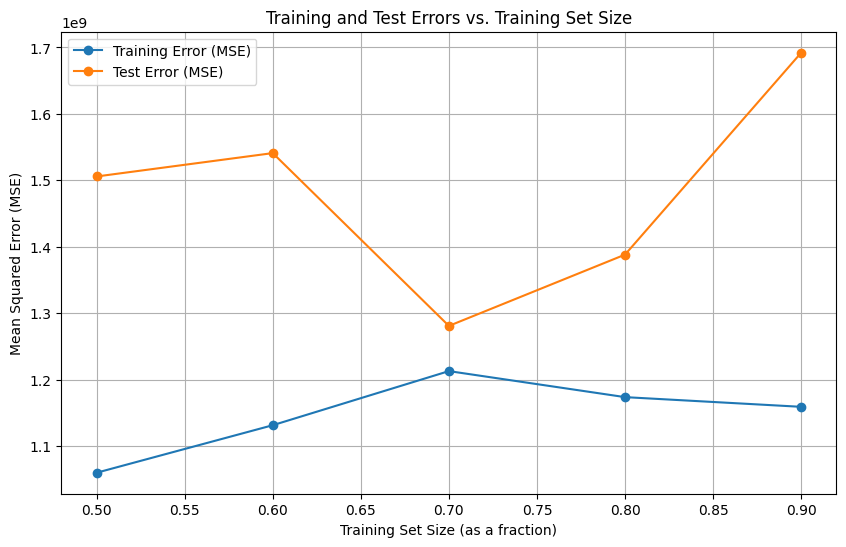

In [32]:
# Your code here
# Set up the range of train-test split sizes
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
split_sizes = np.arange(0.5, 0.91, 0.1)

train_errors = []
test_errors = []
X = X.select_dtypes(include=['float64', 'int64'])
X = X.dropna(axis=1)
for split_size in split_sizes:
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split_size, random_state=42)
       # Preprocessing: Standardize the data
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)

      # Fit a model (Linear Regression)
      model = LinearRegression()
      model.fit(X_train_scaled, y_train)

        # Calculate the training error (MSE)
      y_train_pred = model.predict(X_train_scaled)
      train_mse = mean_squared_error(y_train, y_train_pred)
      train_errors.append(train_mse)

      # Calculate the test error (MSE)
      y_test_pred = model.predict(X_test_scaled)
      test_mse = mean_squared_error(y_test, y_test_pred)
      test_errors.append(test_mse)


# Plot the training and test errors
plt.figure(figsize=(10, 6))
plt.plot(split_sizes, train_errors, label='Training Error (MSE)', marker='o')
plt.plot(split_sizes, test_errors, label='Test Error (MSE)', marker='o')
plt.xlabel('Training Set Size (as a fraction)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Test Errors vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1053 to 1127
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     730 non-null    int64  
 1   MSZoning       730 non-null    object 
 2   LotFrontage    590 non-null    float64
 3   LotArea        730 non-null    int64  
 4   Street         730 non-null    object 
 5   Alley          48 non-null     object 
 6   LotShape       730 non-null    object 
 7   LandContour    730 non-null    object 
 8   Utilities      730 non-null    object 
 9   LotConfig      730 non-null    object 
 10  LandSlope      730 non-null    object 
 11  Neighborhood   730 non-null    object 
 12  Condition1     730 non-null    object 
 13  Condition2     730 non-null    object 
 14  BldgType       730 non-null    object 
 15  HouseStyle     730 non-null    object 
 16  OverallQual    730 non-null    int64  
 17  OverallCond    730 non-null    int64  
 18  YearBuilt  

### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data.

In [ ]:
# Your code here

What's happening here? Evaluate your result!

##  Summary

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.